In [1]:
%pip install numpy pandas matplotlib scikit-learn imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


Note: you may need to restart the kernel to use updated packages.


In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols) 
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"] = (df["class"] == "g").astype(int)

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, Validation, Test Datasets

In [5]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)



    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y

In [8]:
train_df, x_train, y_train = scale_dataset(pd.DataFrame(train, columns=cols), oversample=True)
validation_df, x_valid, y_valid = scale_dataset(pd.DataFrame(valid, columns=cols), oversample=False)
test_df, x_test, y_test = scale_dataset(pd.DataFrame(test, columns=cols), oversample=False)

# kNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [10]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
y_pred = knn_model.predict(x_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1324
           1       0.83      0.88      0.86      2480

    accuracy                           0.81      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [15]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.50      1324
           1       0.74      0.89      0.81      2480

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

LogisticRegression()

In [18]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1324
           1       0.84      0.81      0.83      2480

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# SVM

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [21]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1324
           1       0.89      0.89      0.89      2480

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Nueural Net

In [27]:
import tensorflow as tf

In [38]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(10, 4))
    ax1.plot(history.history["loss"], label="loss")
    ax1.plot(history.history["val_loss"], label="val_loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary Crossentropy")
    ax1.grid(True)
    
    ax2.plot(history.history["accuracy"], label="accuracy")
    ax2.plot(history.history["val_accuracy"], label="val_accuracy")
    ax2.set_ylabel("Accuracy")
    ax2.set_xlabel("Epoch")
    ax2.grid(True)
    
    plt.show()
   

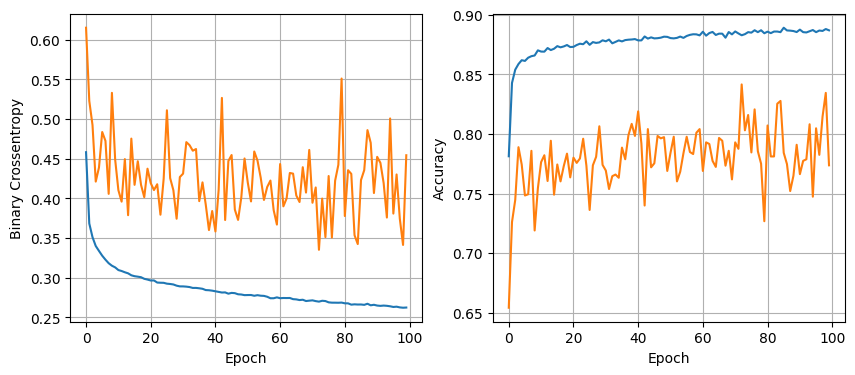

In [39]:
plot_history(history)

In [45]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=0,
)

    return nn_model, history

Training with num_nodes=16, dropout_prob=0, lr=0.01, batch_size=32


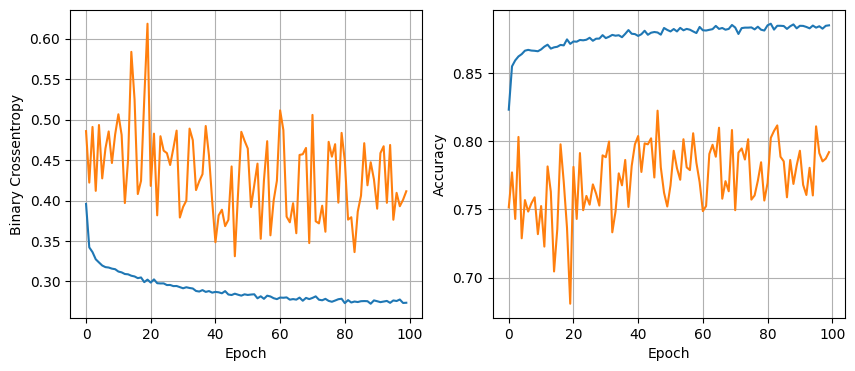

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3523
Training with num_nodes=16, dropout_prob=0, lr=0.01, batch_size=64


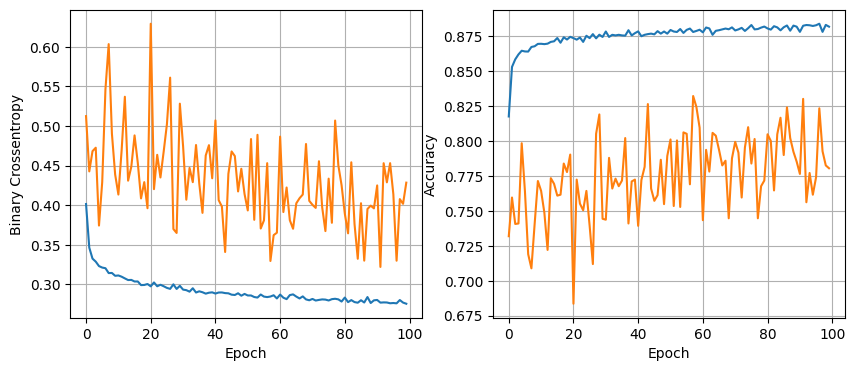

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.3254
Training with num_nodes=16, dropout_prob=0, lr=0.01, batch_size=128


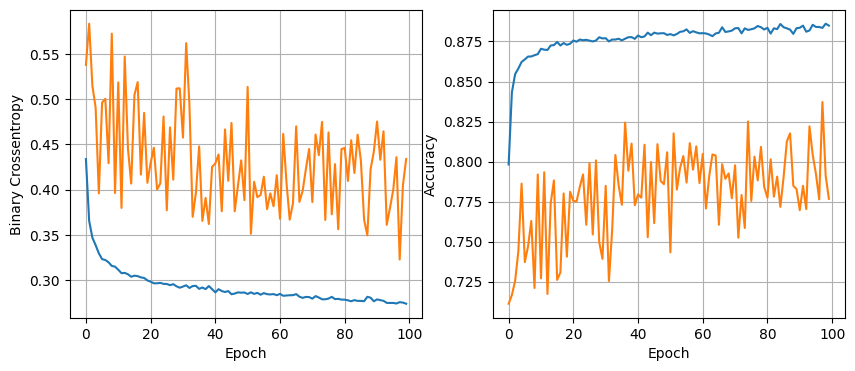

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3288
Training with num_nodes=16, dropout_prob=0, lr=0.005, batch_size=32


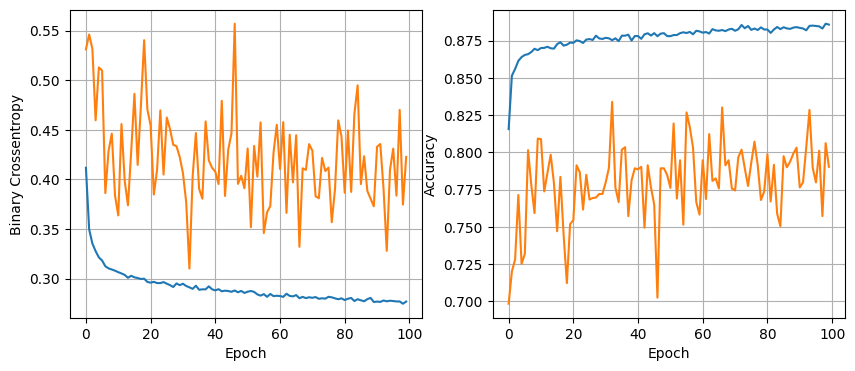

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3186
Training with num_nodes=16, dropout_prob=0, lr=0.005, batch_size=64


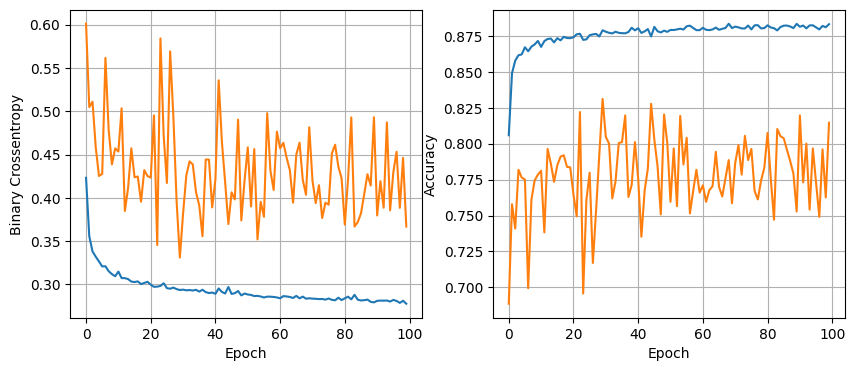

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.3366
Training with num_nodes=16, dropout_prob=0, lr=0.005, batch_size=128


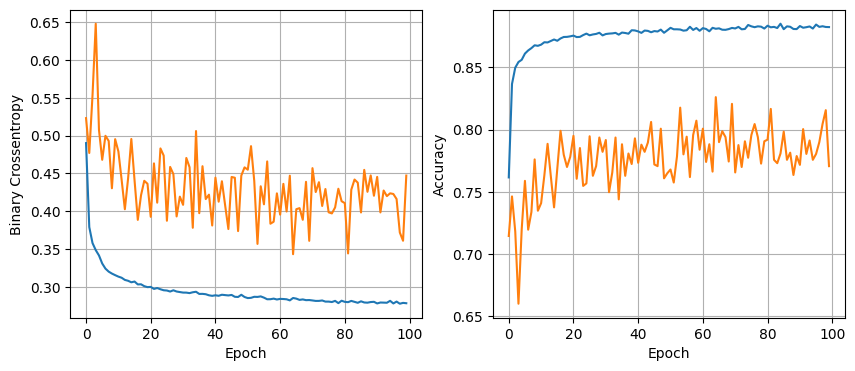

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8602 - loss: 0.3250
Training with num_nodes=16, dropout_prob=0, lr=0.001, batch_size=32


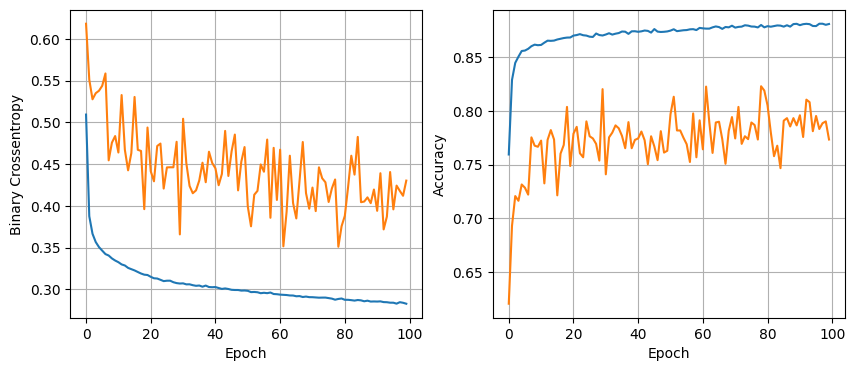

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8619 - loss: 0.3187
Training with num_nodes=16, dropout_prob=0, lr=0.001, batch_size=64


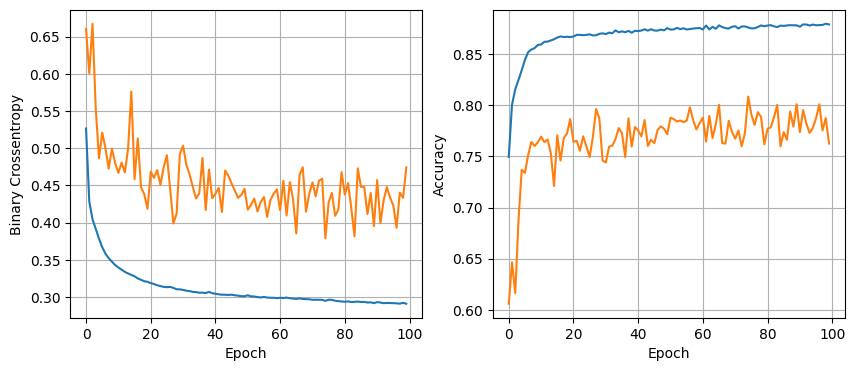

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.3373
Training with num_nodes=16, dropout_prob=0, lr=0.001, batch_size=128


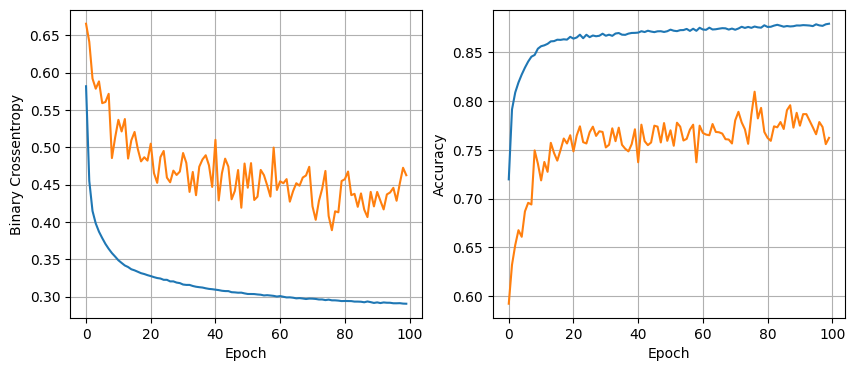

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.3276
Training with num_nodes=16, dropout_prob=0.2, lr=0.01, batch_size=32


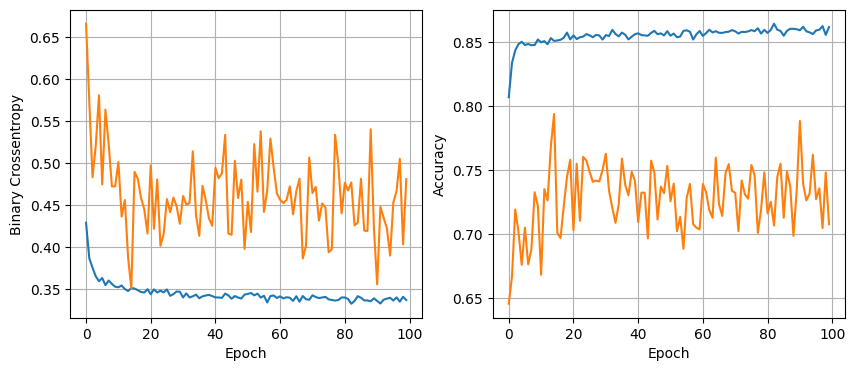

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8601 - loss: 0.3327
Training with num_nodes=16, dropout_prob=0.2, lr=0.01, batch_size=64


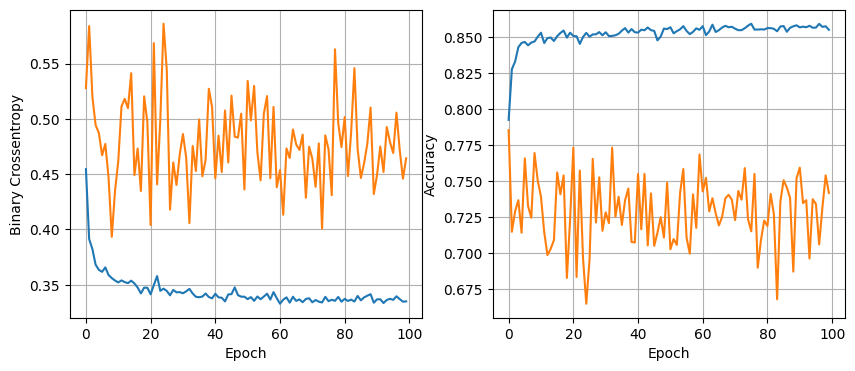

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.3241
Training with num_nodes=16, dropout_prob=0.2, lr=0.01, batch_size=128


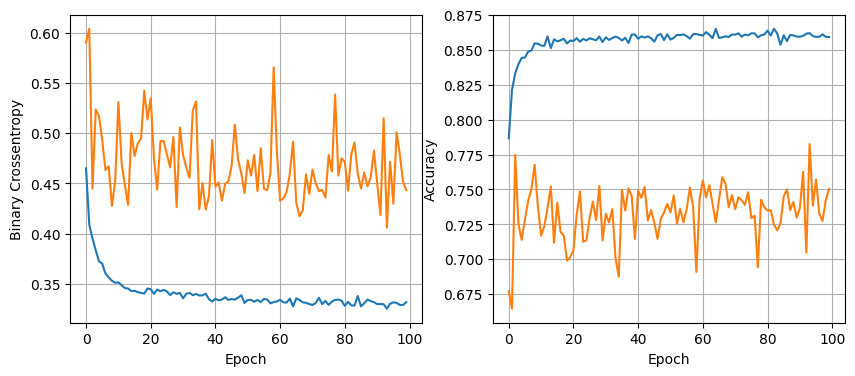

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.3230
Training with num_nodes=16, dropout_prob=0.2, lr=0.005, batch_size=32


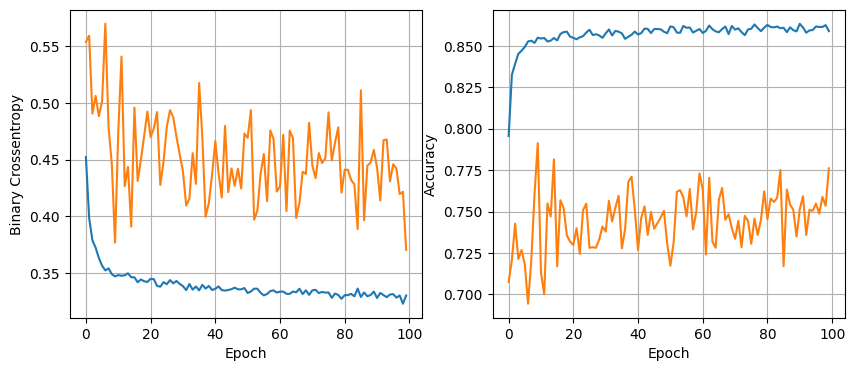

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8607 - loss: 0.3333
Training with num_nodes=16, dropout_prob=0.2, lr=0.005, batch_size=64


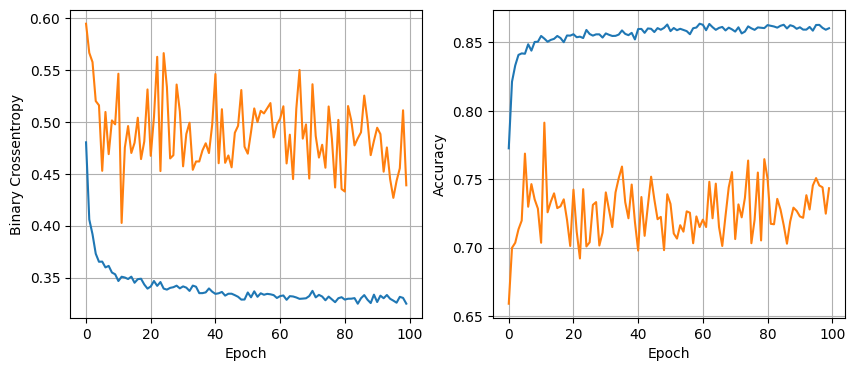

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8600 - loss: 0.3247
Training with num_nodes=16, dropout_prob=0.2, lr=0.005, batch_size=128


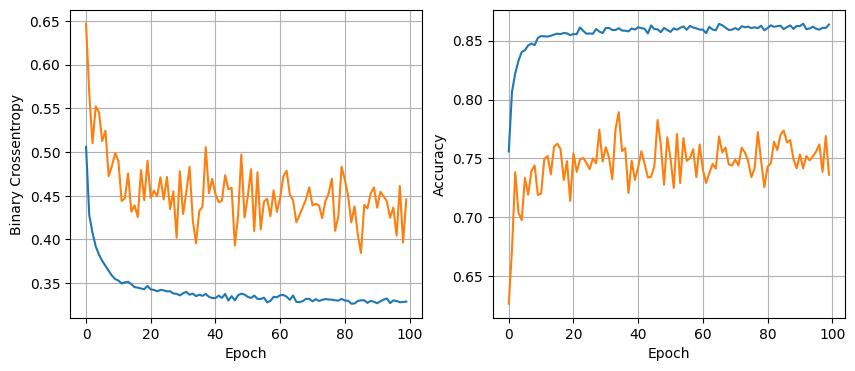

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8546 - loss: 0.3281
Training with num_nodes=16, dropout_prob=0.2, lr=0.001, batch_size=32


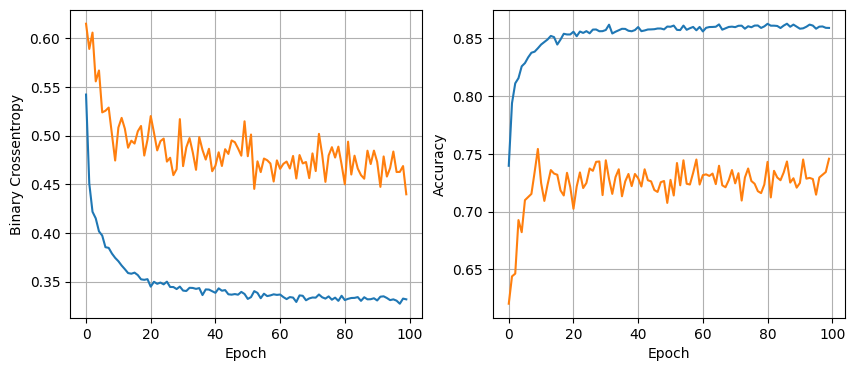

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8589 - loss: 0.3244
Training with num_nodes=16, dropout_prob=0.2, lr=0.001, batch_size=64


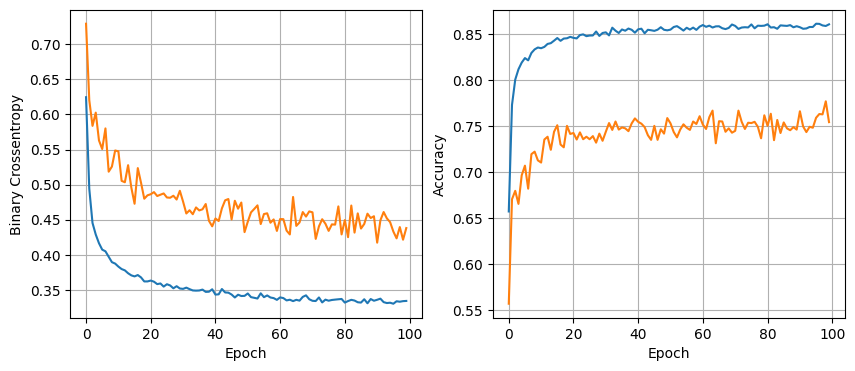

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8582 - loss: 0.3241
Training with num_nodes=16, dropout_prob=0.2, lr=0.001, batch_size=128


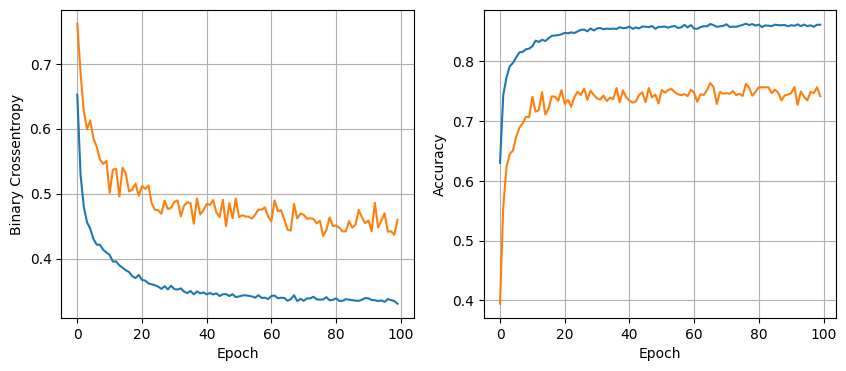

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8577 - loss: 0.3235
Training with num_nodes=32, dropout_prob=0, lr=0.01, batch_size=32


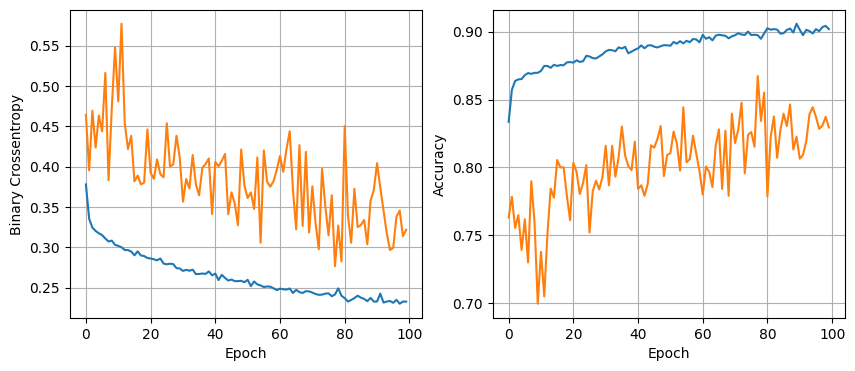

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.3925
Training with num_nodes=32, dropout_prob=0, lr=0.01, batch_size=64


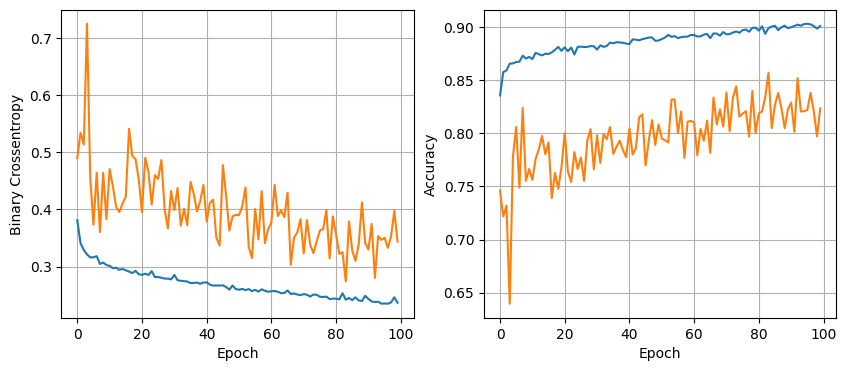

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.3957
Training with num_nodes=32, dropout_prob=0, lr=0.01, batch_size=128


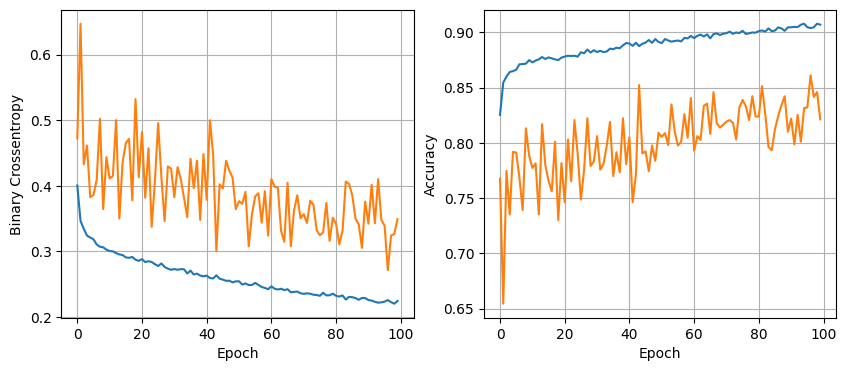

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8536 - loss: 0.3953
Training with num_nodes=32, dropout_prob=0, lr=0.005, batch_size=32


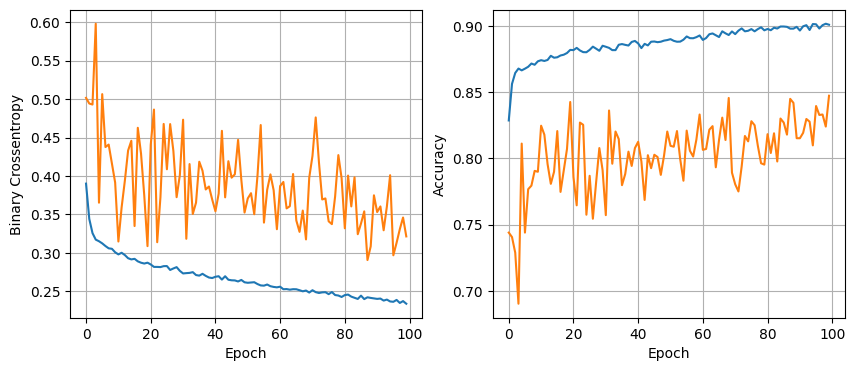

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8513 - loss: 0.4267
Training with num_nodes=32, dropout_prob=0, lr=0.005, batch_size=64


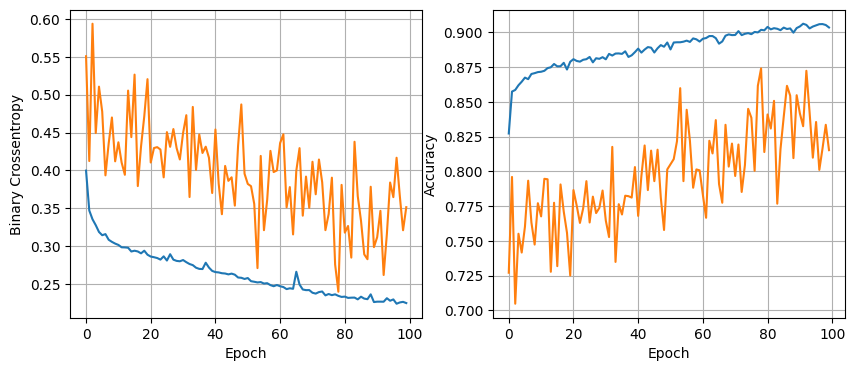

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8671 - loss: 0.3603
Training with num_nodes=32, dropout_prob=0, lr=0.005, batch_size=128


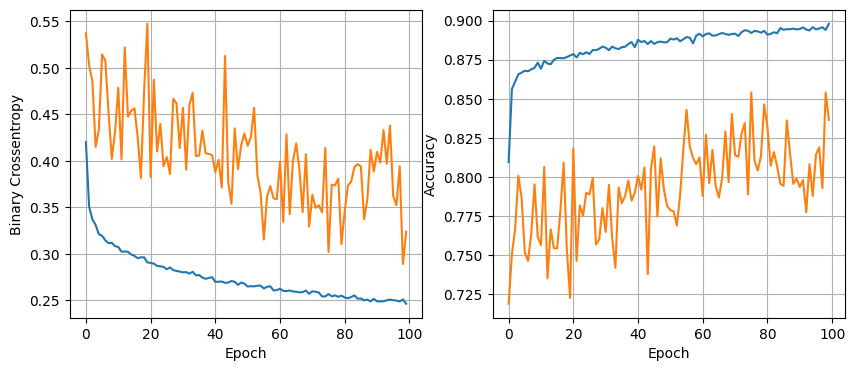

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.3497
Training with num_nodes=32, dropout_prob=0, lr=0.001, batch_size=32


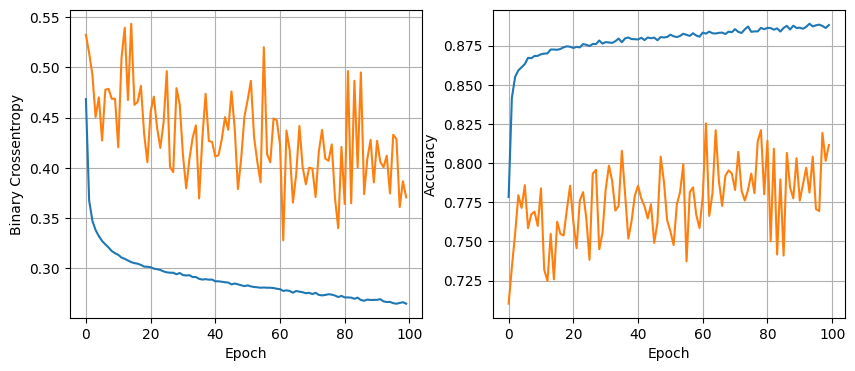

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3271
Training with num_nodes=32, dropout_prob=0, lr=0.001, batch_size=64


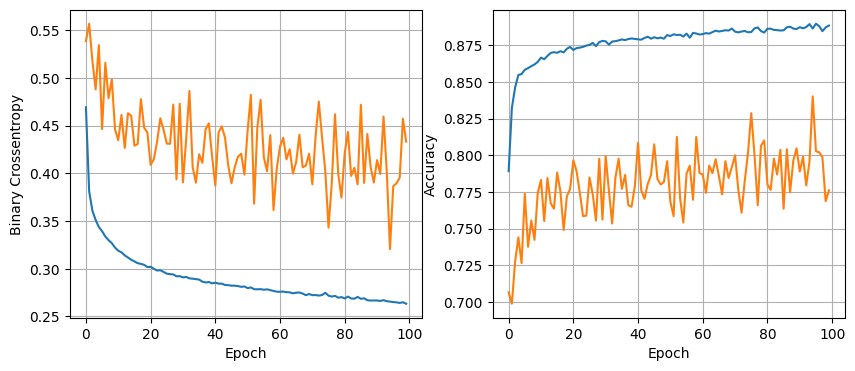

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8636 - loss: 0.3317
Training with num_nodes=32, dropout_prob=0, lr=0.001, batch_size=128


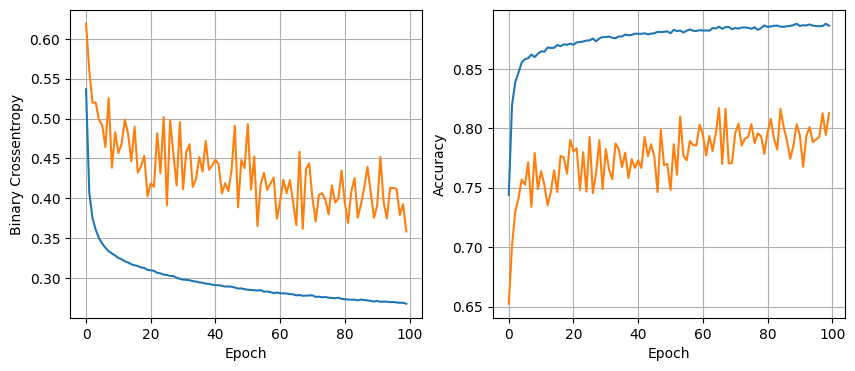

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8628 - loss: 0.3284
Training with num_nodes=32, dropout_prob=0.2, lr=0.01, batch_size=32


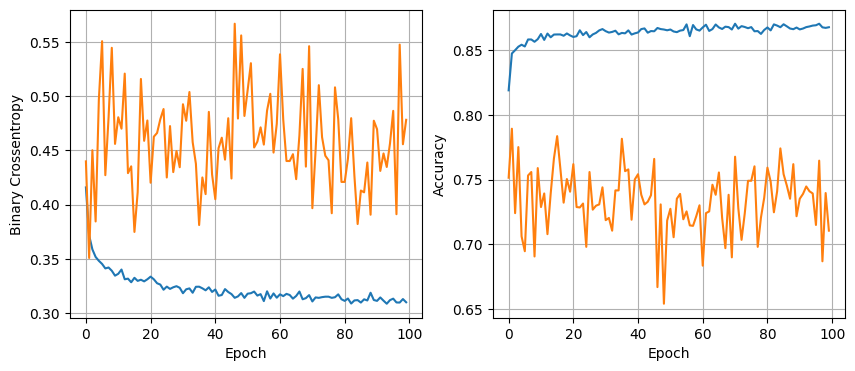

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8499 - loss: 0.3499
Training with num_nodes=32, dropout_prob=0.2, lr=0.01, batch_size=64


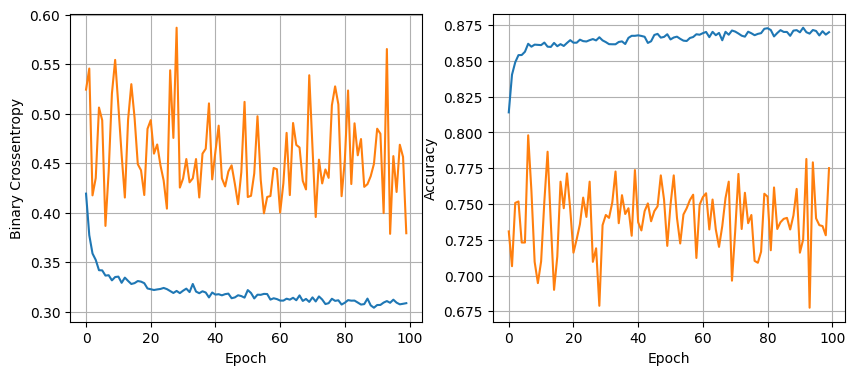

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3255
Training with num_nodes=32, dropout_prob=0.2, lr=0.01, batch_size=128


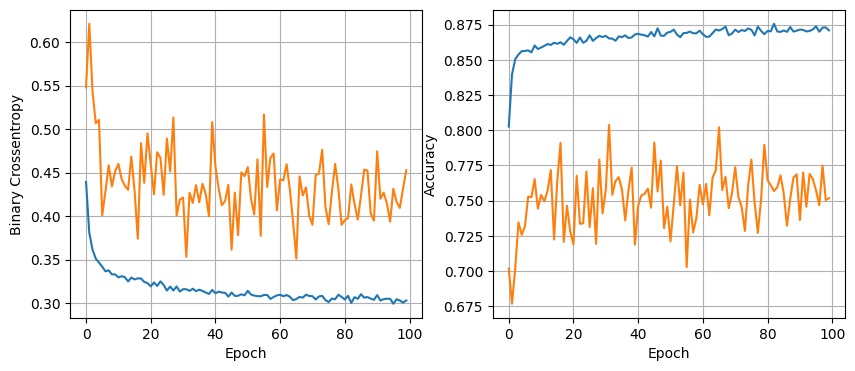

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8634 - loss: 0.3212
Training with num_nodes=32, dropout_prob=0.2, lr=0.005, batch_size=32


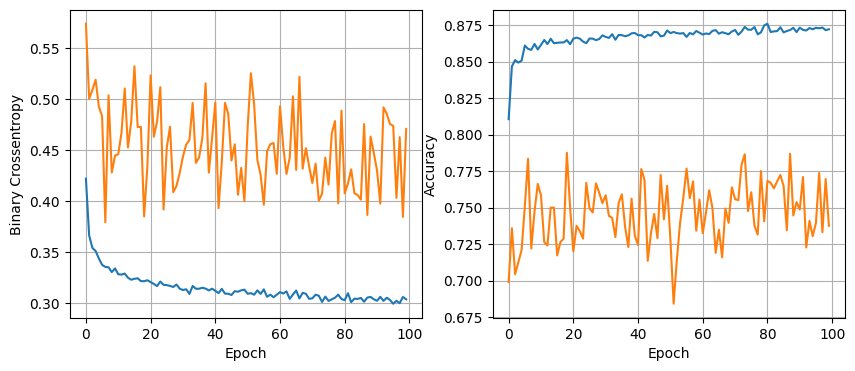

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8544 - loss: 0.3279
Training with num_nodes=32, dropout_prob=0.2, lr=0.005, batch_size=64


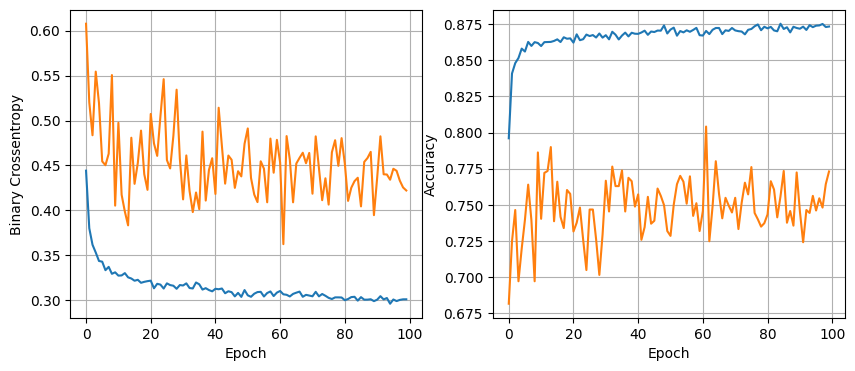

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8591 - loss: 0.3173
Training with num_nodes=32, dropout_prob=0.2, lr=0.005, batch_size=128


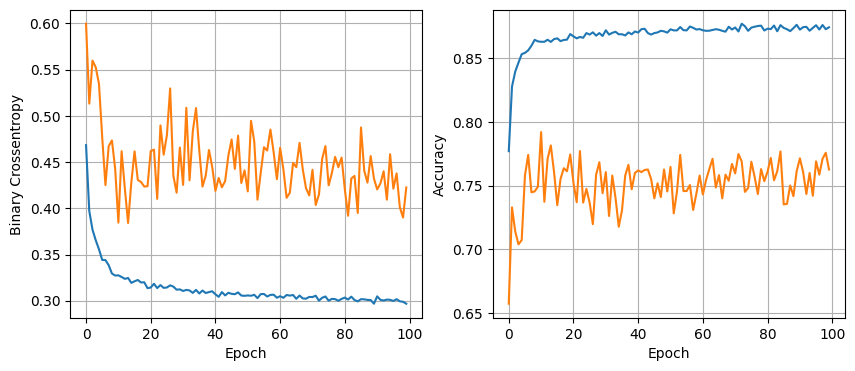

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8678 - loss: 0.3134
Training with num_nodes=32, dropout_prob=0.2, lr=0.001, batch_size=32


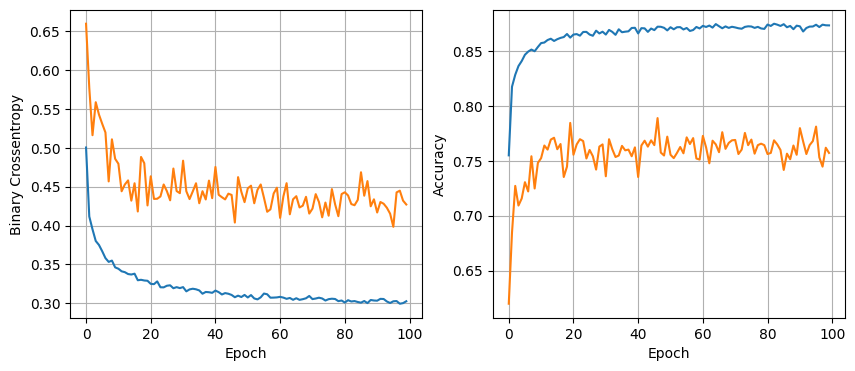

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8665 - loss: 0.3118
Training with num_nodes=32, dropout_prob=0.2, lr=0.001, batch_size=64


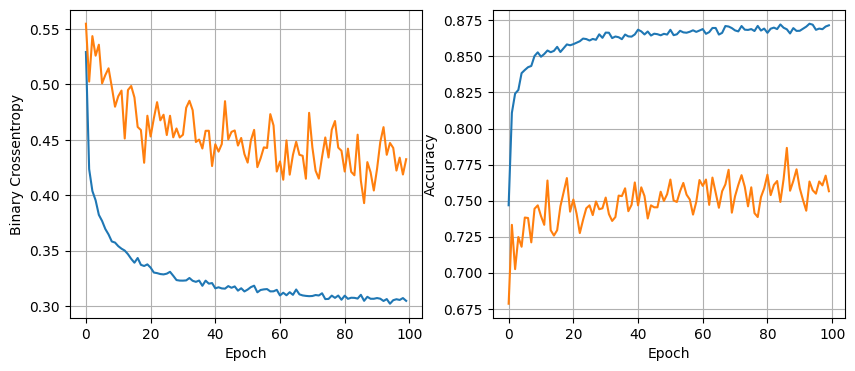

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8610 - loss: 0.3145
Training with num_nodes=32, dropout_prob=0.2, lr=0.001, batch_size=128


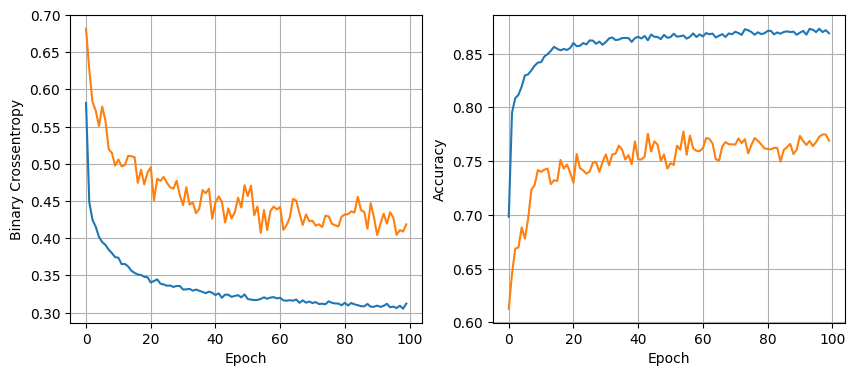

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3170
Training with num_nodes=64, dropout_prob=0, lr=0.01, batch_size=32


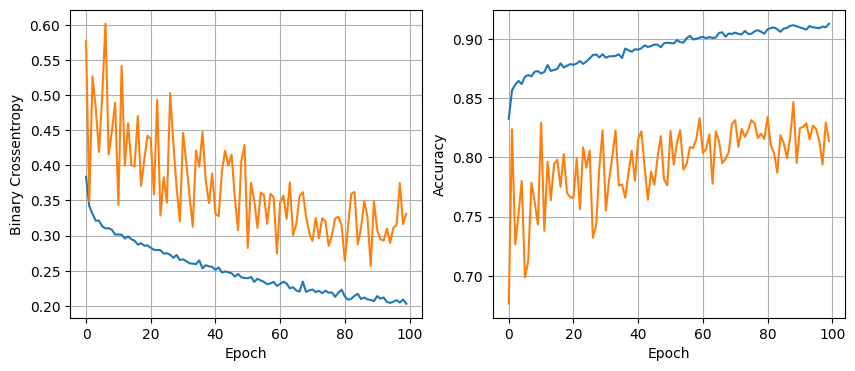

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8589 - loss: 0.5330
Training with num_nodes=64, dropout_prob=0, lr=0.01, batch_size=64


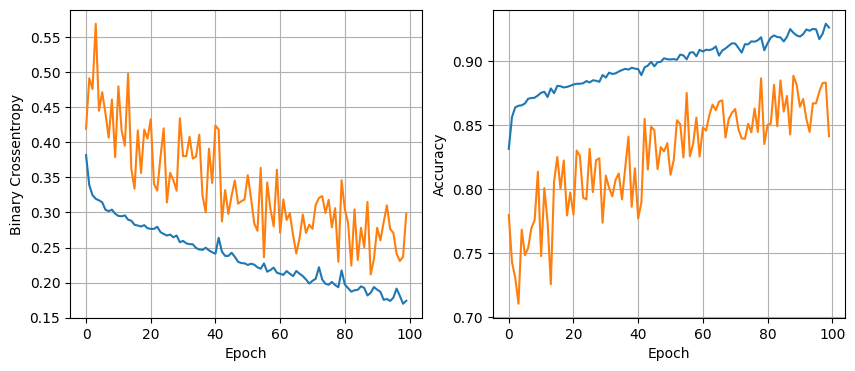

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8572 - loss: 0.5561
Training with num_nodes=64, dropout_prob=0, lr=0.01, batch_size=128


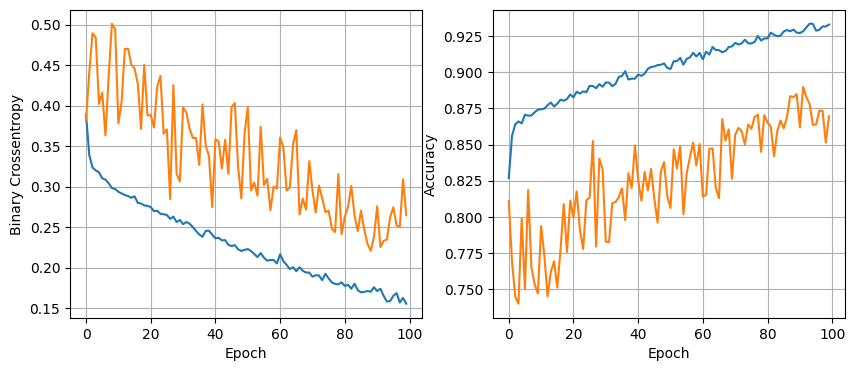

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.5684
Training with num_nodes=64, dropout_prob=0, lr=0.005, batch_size=32


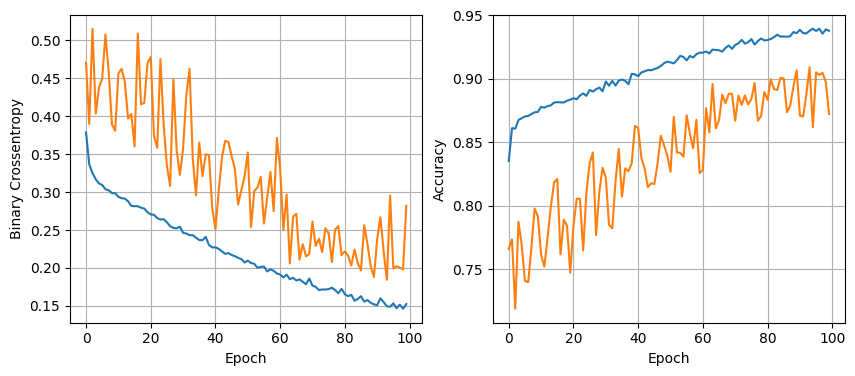

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8529 - loss: 0.7150
Training with num_nodes=64, dropout_prob=0, lr=0.005, batch_size=64


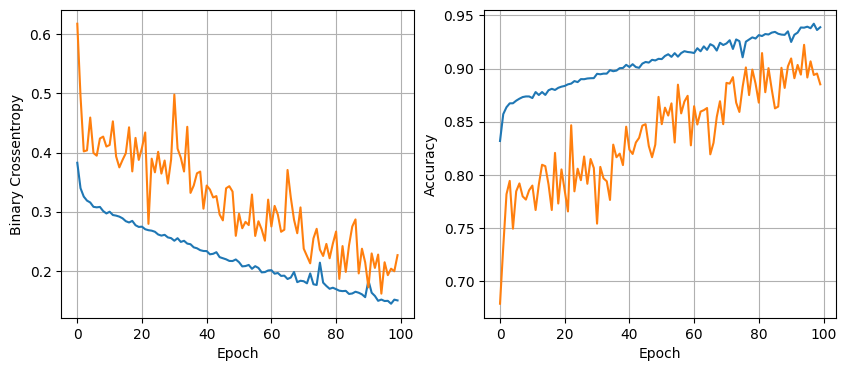

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.6092
Training with num_nodes=64, dropout_prob=0, lr=0.005, batch_size=128


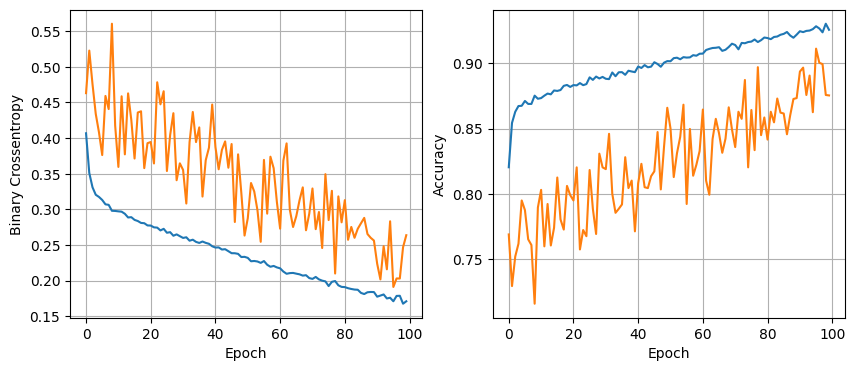

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8634 - loss: 0.4887
Training with num_nodes=64, dropout_prob=0, lr=0.001, batch_size=32


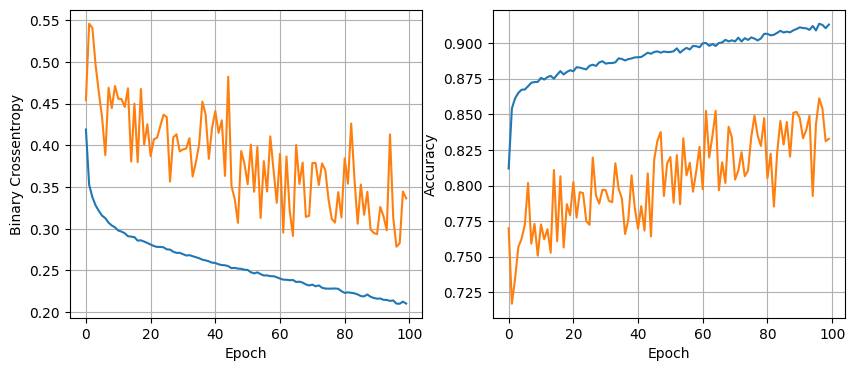

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8604 - loss: 0.3643
Training with num_nodes=64, dropout_prob=0, lr=0.001, batch_size=64


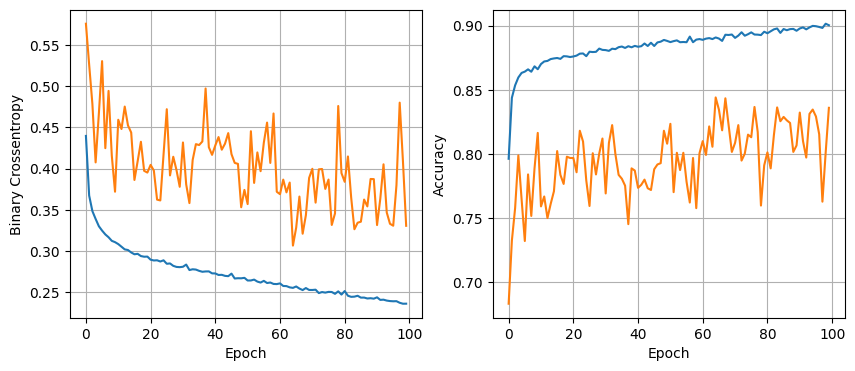

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8601 - loss: 0.3461
Training with num_nodes=64, dropout_prob=0, lr=0.001, batch_size=128


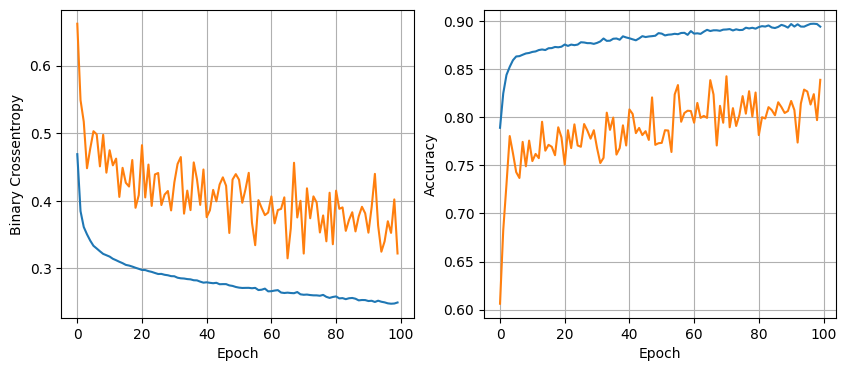

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.3408
Training with num_nodes=64, dropout_prob=0.2, lr=0.01, batch_size=32


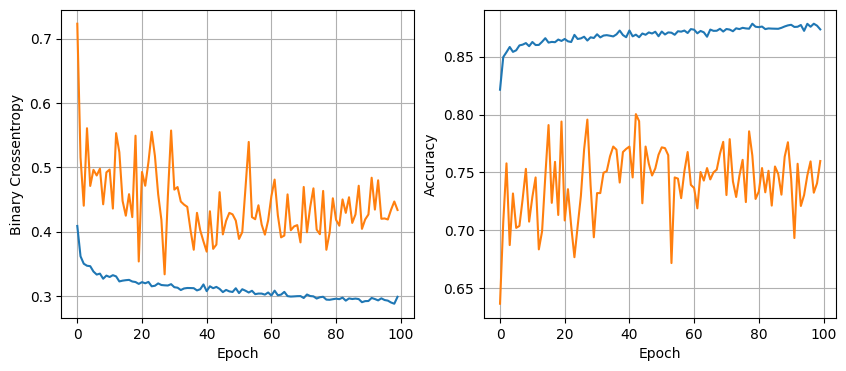

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8636 - loss: 0.3344
Training with num_nodes=64, dropout_prob=0.2, lr=0.01, batch_size=64


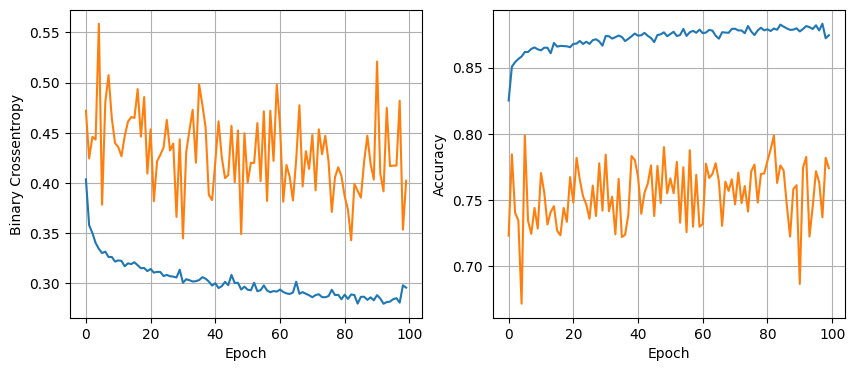

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8610 - loss: 0.3392
Training with num_nodes=64, dropout_prob=0.2, lr=0.01, batch_size=128


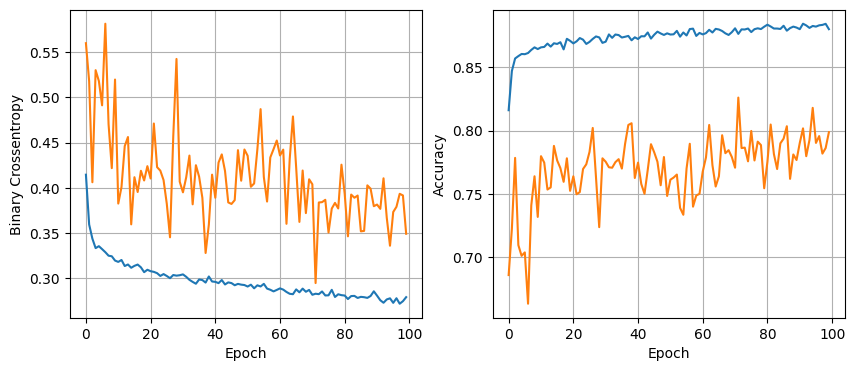

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8669 - loss: 0.3257
Training with num_nodes=64, dropout_prob=0.2, lr=0.005, batch_size=32


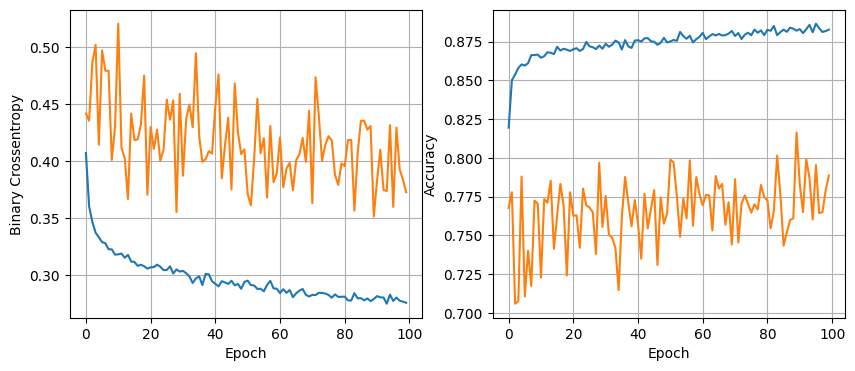

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8644 - loss: 0.3224
Training with num_nodes=64, dropout_prob=0.2, lr=0.005, batch_size=64


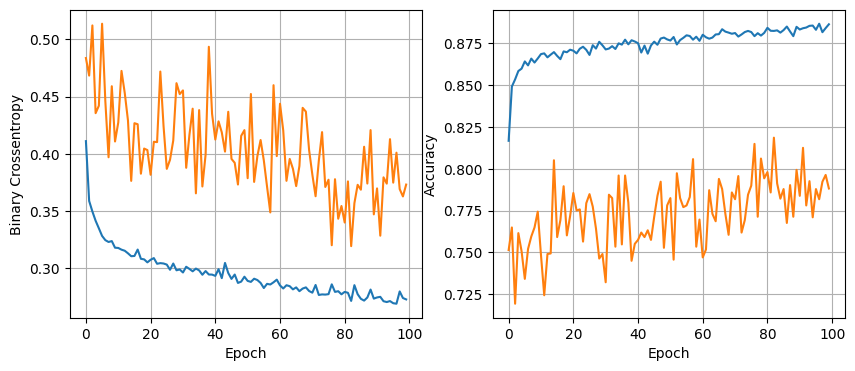

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8634 - loss: 0.3296
Training with num_nodes=64, dropout_prob=0.2, lr=0.005, batch_size=128


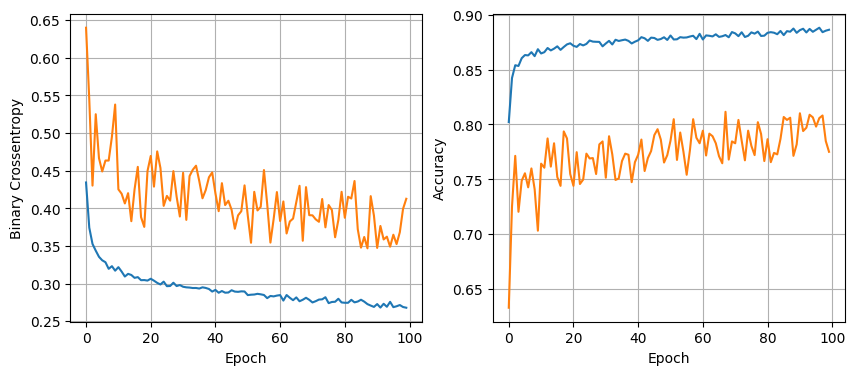

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8655 - loss: 0.3177
Training with num_nodes=64, dropout_prob=0.2, lr=0.001, batch_size=32


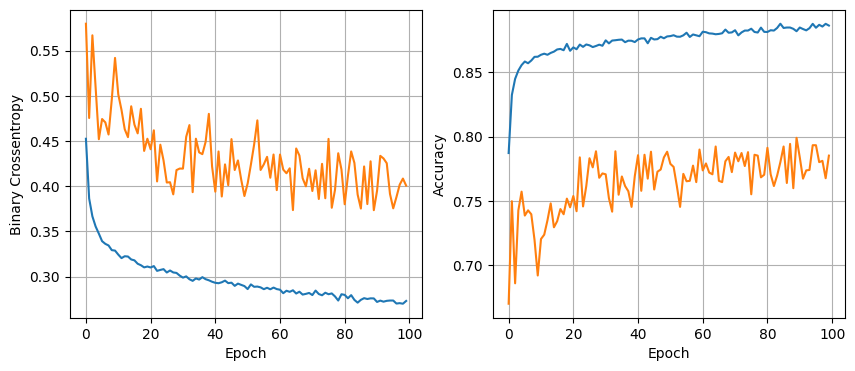

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8718 - loss: 0.3089
Training with num_nodes=64, dropout_prob=0.2, lr=0.001, batch_size=64


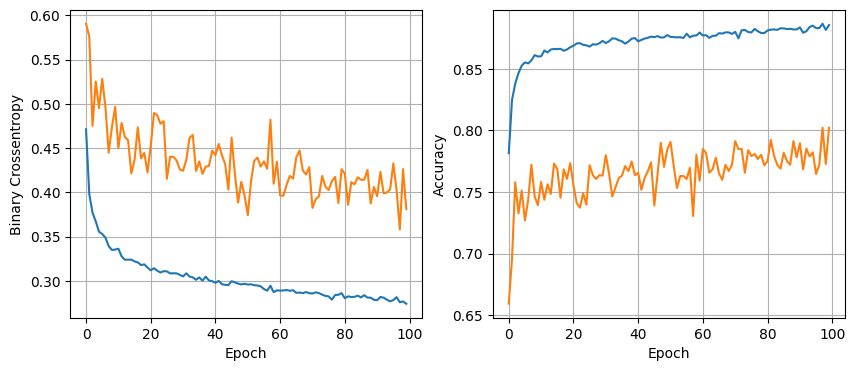

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.3101
Training with num_nodes=64, dropout_prob=0.2, lr=0.001, batch_size=128


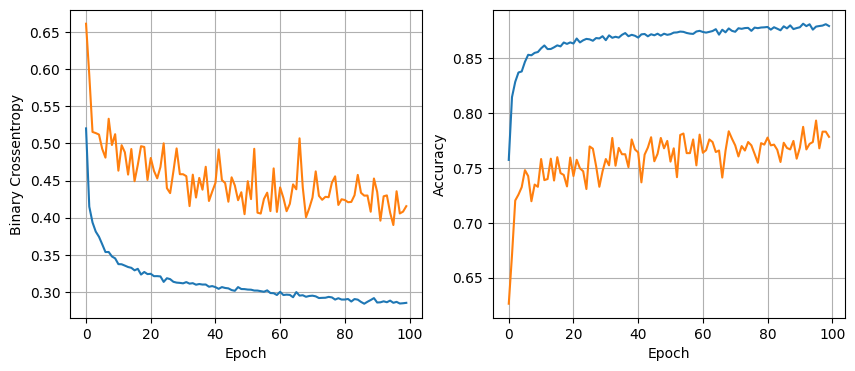

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 0.3072


In [47]:
least_val_loss = float("inf")
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32,64, 128]:
                print(f"Training with num_nodes={num_nodes}, dropout_prob={dropout_prob}, lr={lr}, batch_size={batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model